# Assignment on Classification
#### Do the following in the iris dataset
#### 1. Read the dataset to python environment
#### 2. Do the necessary pre-processing steps
#### 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset to python environment

In [6]:
data =pd.read_excel("iris (1).xls") #loading the dataset
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
data.shape  #dimension of the dataset50 rows & 5 columns

(150, 5)

In [8]:
data.info()  #basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.describe()  #statistical information about the dataset

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

## 2. Do the necessary pre-processing steps

##### Checking for missing values 

In [12]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
data['Classification'].value_counts() # checking number of values in each category of classification column.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

#### Handling the missing values

In [14]:
# Checking the distribution of SL

C:\Users\anugr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skewness is : 0.3068227108046868


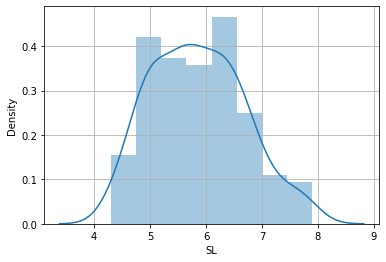

In [21]:
sns.distplot(data['SL'])
plt.grid()
print("The skewness is :", data['SL'].skew())

    

In [22]:
#Filling the missing value with the median
data['SL'] =data['SL'].fillna(data['SL'].median())

C:\Users\anugr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The skewness is :  0.37781843718771746


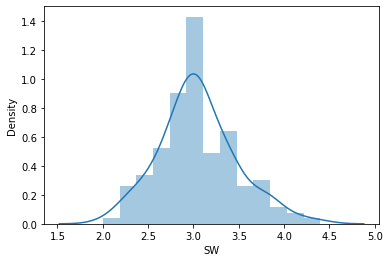

In [23]:
# Checking the distribution of SW
sns.distplot(data['SW'])
print('The skewness is : ', data.SW.skew())

In [24]:
#Filling missing values with the median.
data['SW'] =data['SW'].fillna(data['SW'].median())

The skewness is :  -0.3125678285137702


C:\Users\anugr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


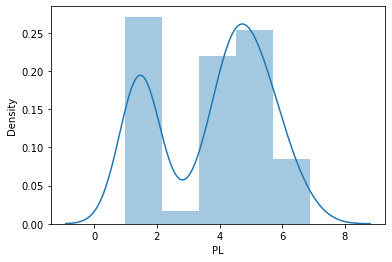

In [31]:
# Checking the distribution of PL
sns.distplot(data['PL'])
print('The skewness is : ', data['PL'].skew())

In [29]:
#Filling missing values with the median.
data['PL'] =data['PL'].fillna(data['PL'].median())

In [30]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
# Thus , we have filled all the missing values in the dataset.

#### Checking for outliers

<AxesSubplot:xlabel='Classification', ylabel='PW'>

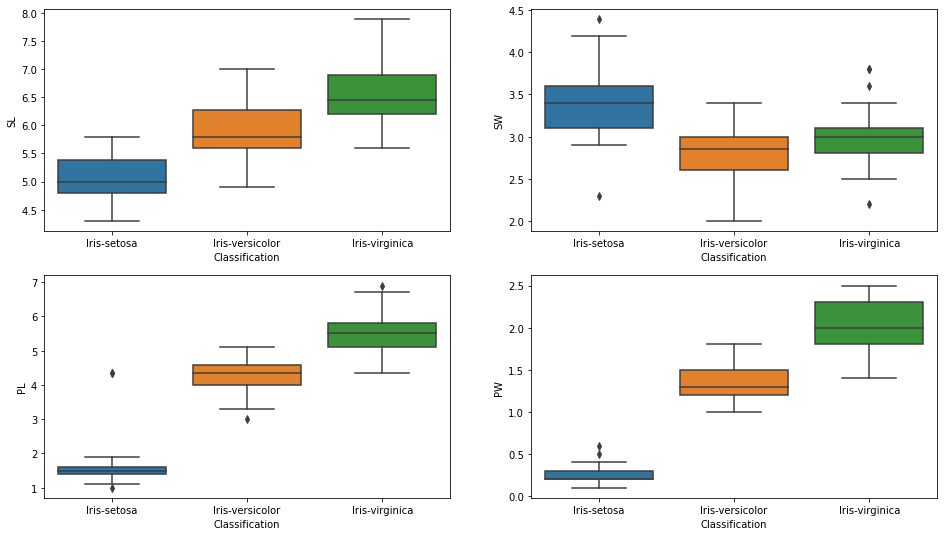

In [33]:
fig , axes =plt.subplots(2,2, figsize=(16,9))
sns.boxplot( x='Classification' , y='SL' , data=data ,ax = axes[0,0])
sns.boxplot( x='Classification', y ='SW' , data=data ,ax = axes[0,1])
sns.boxplot( x='Classification', y ='PL' , data=data ,ax = axes[1,0])
sns.boxplot( x='Classification', y ='PW' , data=data ,ax = axes[1,1])


In [34]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### We can leave the outliers as such since they are in acceptable range and their removal in such a small dataset may result imbalance

## 3. Find out which classification model gives the best result

In [42]:
# splitting the data into features and target
y= data['Classification']
x= data.drop('Classification', axis=1)

<AxesSubplot:>

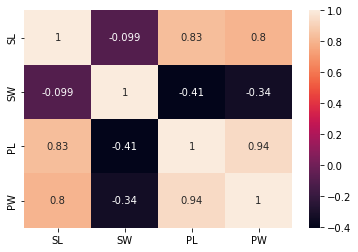

In [44]:
# Checking correlation 
sns.heatmap(data.corr() , annot =True)

In [45]:
#splitting the dataset into training and testing data 

from sklearn.model_selection import train_test_split #importing the required library for it.
xtrain, xtest, ytrain ,ytest = train_test_split(x, y , test_size =0.25, random_state =42)

In [47]:
xtrain.shape

(112, 4)

In [48]:
xtest.shape

(38, 4)

### (1) Logistic Regression Model

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix 

In [56]:
lr = LogisticRegression()  # creating an instance
model_lr = lr.fit(xtrain, ytrain) #fitting data into the model
ypred_lr =model_lr.predict(xtest) #prdicting values for test data

C:\Users\anugr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
#model Evaluation
print(confusion_matrix(ytest, ypred_lr))
print("Accuracy score of LR model is :",accuracy_score(ytest, ypred_lr))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy score of LR model is : 0.9736842105263158


### (2). KNN Model

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
metric_k =[] # creating an empty list to store the accuracy
neighbors = np.arange(3,15) #

for k in neighbors: #for each k, we are creating the model and finding the accuracy
    knn = KNeighborsClassifier(n_neighbors =k)  #creating an instance
    model_knn = knn.fit(xtrain,ytrain)  #fitting the data into the model
    ypred_knn = model_knn.predict(xtest)  #predicting the values of xtest
    acc = accuracy_score(ytest, ypred_knn)  # accuracy of the model.
    metric_k.append(acc) 

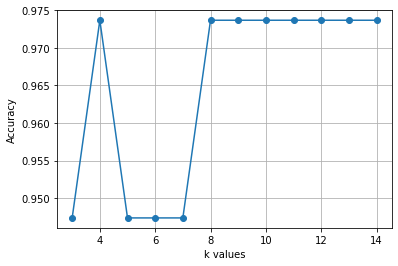

In [66]:
#we plot  the graph and then checking for k which gives maximum accuracy
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.grid()

In [67]:
#creating the model using k = 4
knn =KNeighborsClassifier(n_neighbors =4)
model2 = knn.fit(xtrain,ytrain)
ypred_knn = model2.predict(xtest)

In [74]:
#Evaluating the model
print(confusion_matrix(ytest,ypred_knn))
print("Accuracy score of KNN model is :",accuracy_score(ytest,ypred_knn))


[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy score of KNN model is : 0.9736842105263158


### (3). SVM Model

In [75]:
from sklearn.svm import SVC

#### RBF SVM Model

In [73]:
svm_clf =SVC(kernel ='rbf') # creating instance
model3 = svm_clf.fit(xtrain,ytrain) #fitting data into the model
ypred = model3.predict(xtest) # predicting values for xtest

In [77]:
# Evaluating the model
print(confusion_matrix(ytest, ypred))
print("Accuracy score of RBF SVM model is :",accuracy_score(ytest, ypred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy score of RBF SVM model is : 0.9736842105263158


#### Linear SVM Model

In [82]:
svm_linear =SVC(kernel ='linear') # creating instance
model4 = svm_linear.fit(xtrain,ytrain)  #fitting data into the model
ypred = model4.predict(xtest) # predicting values for xtest

In [83]:
#Evaluating the model
print(confusion_matrix(ytest, ypred))
print("Accuracy score of Linear SVM model is :",accuracy_score(ytest, ypred))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy score of Linear SVM model is : 1.0


#### Polynomial SVM Model


In [91]:
svm_poly = SVC(kernel= "poly", degree =3)  #creating instance
model5 =svm_poly.fit(xtrain,ytrain)  #fitting data into the model.
ypred_poly = model5.predict(xtest) #predicting the values for xtest

In [92]:
# Evaluating the model
print(confusion_matrix(ytest, ypred_poly))
print("Accuracy score of polynomial SVM model is :",accuracy_score(ytest, ypred_poly))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
Accuracy score of polynomial SVM model is : 0.9736842105263158


## (4). Decision Tree Model

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
d_tree = DecisionTreeClassifier() #creating instance
d_tree.fit(xtrain,ytrain)         #fitting data into the model.
ypred_tree =d_tree.predict(xtest)#predicting the values for xtest

In [101]:
print(confusion_matrix(ytest, ypred_tree))
print("Accuracy score of Decision tree model is :",accuracy_score(ytest, ypred_tree))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy score of Decision tree model is : 1.0


## (5). Random Forest Model

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf_model = RandomForestClassifier() #creating instance
rf_model.fit(xtrain,ytrain) #fitting data into the model.
ypred_randf= rf_model.predict(xtest) #predicting the values for xtest

In [100]:
print(confusion_matrix(ytest, ypred_randf))
print("Accuracy score of Random forest model is :",accuracy_score(ytest, ypred_randf))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
Accuracy score of Random forest model is : 1.0


### Accuracy for the Various models created is:
###### Logistic Regression Model	: 0.974
###### kNN Model	                           : 0.974
###### Radial SVM Model	                  : 0.974        
###### linear SVM Model	                    : 1.0
###### Polynomial SVM Model	          : 0.974
###### Decision tree Model	               : 1.0
###### Random forest Model               :1.0  


Inference: 
    All the models are performing really well. However linear SVM model and Tree based models have accuracy 1.0. 
    This is mainly because, Tree-based models are generally not much affected by outliers in our dataset, while regression-based     models are.